<a href="https://colab.research.google.com/github/KNagaveni/3D-MODELS/blob/main/veni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install Required Libraries
!pip install pandas numpy scikit-learn nltk matplotlib seaborn transformers torch torchvision

In [3]:
# Step 2: Upload and Load the Truncated Dataset
from google.colab import files
import pandas as pd

In [4]:
# Upload the truncated CSV file manually
uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [5]:
file_name = list(uploaded.keys())[0]

In [6]:
nrows = 5000  # Number of rows to load
df = pd.read_csv(file_name, nrows=nrows)


In [7]:
# Inspect the truncated data
print("Truncated Dataset Shape:", df.shape)
df = df[['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
         'Score', 'Time', 'Summary', 'Text']]
df.dropna(inplace=True)  # Drop rows with missing values
print("Data Sample:")
df.head()

Truncated Dataset Shape: (5000, 10)
Data Sample:


<ipython-input-7-787407203cba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)  # Drop rows with missing values


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download punkt_tab for sentence tokenization

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs, special characters, and normalize text
    text = re.sub(r"http\S+|www\S+", '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Normalize text
    tokens = word_tokenize(text) # This will now work correctly
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Apply preprocessing
df['cleaned_text'] = df['Text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [18]:
# Inspect the data
print("Dataset Columns:", df.columns)
df = df[['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
         'Score', 'Time', 'Summary', 'Text']]
df.dropna(inplace=True)  # Drop rows with missing values
print("Data Sample:")
df.head()

Dataset Columns: Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'cleaned_text'],
      dtype='object')
Data Sample:


<ipython-input-18-30dc7a7feaf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)  # Drop rows with missing values


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [19]:
# Step 3: Preprocess the Text Data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs, special characters, and normalize text
    text = re.sub(r"http\S+|www\S+", '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Normalize text
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Apply preprocessing
df['cleaned_text'] = df['Text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# Step 4: Sentiment Analysis and Key Phrase Extraction
from transformers import pipeline
from collections import Counter
from itertools import chain
from transformers import AutoTokenizer
import pandas as pd

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Sentiment Analysis using Hugging Face Transformers with truncation and batching
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", tokenizer=tokenizer)

# Function to analyze sentiment in batches
def analyze_sentiment_batch(texts, batch_size=32):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i : i + batch_size]  # Get a batch of texts
        batch_results = sentiment_analyzer(batch, truncation=True, max_length=512)
        results.extend(batch_results)
    return results

# Apply sentiment analysis in batches
batch_results = analyze_sentiment_batch(df['cleaned_text'].tolist())

# Extract sentiment labels and scores
df['sentiment'] = [result['label'] for result in batch_results]
df['sentiment_score'] = [result['score'] for result in batch_results]

# Extract key phrases
def extract_key_phrases(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word.isalnum()]

all_phrases = list(chain(*df['cleaned_text'].apply(extract_key_phrases)))
most_common_phrases = Counter(all_phrases).most_common(10)
print("Most Common Key Phrases:", most_common_phrases)

Device set to use cpu


Most Common Key Phrases: [('br', 2153), ('like', 2123), ('good', 1760), ('taste', 1723), ('flavor', 1606), ('product', 1549), ('one', 1500), ('great', 1450), ('love', 1300), ('chip', 1237)]


In [23]:
# Step 5: Multi-Modal Feature Engineering
df['helpfulness_ratio'] = df['HelpfulnessNumerator'] / (df['HelpfulnessDenominator'] + 1e-5)
features = df[['sentiment_score', 'helpfulness_ratio']]

In [24]:
# Step 6: Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Prepare the dataset for modeling
X = features
y = df['Score']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Train a Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)


GradientBoostingRegressor()

In [28]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Model Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Model Performance:
Mean Squared Error (MSE): 1.644285595460581
R-squared Score: 0.07841804896170168


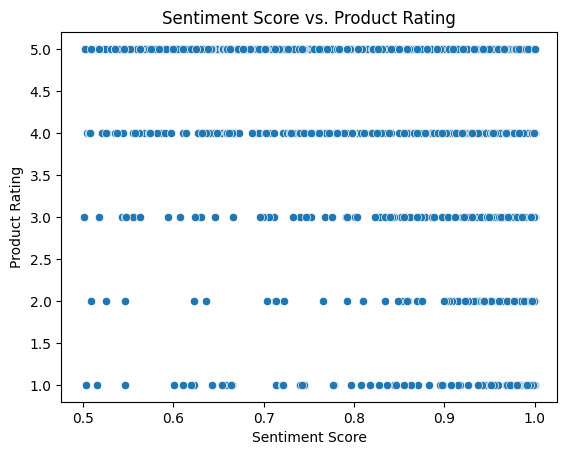

In [29]:
# Step 7: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment vs. Product Ratings
sns.scatterplot(data=df, x='sentiment_score', y='Score')
plt.title("Sentiment Score vs. Product Rating")
plt.xlabel("Sentiment Score")
plt.ylabel("Product Rating")
plt.show()

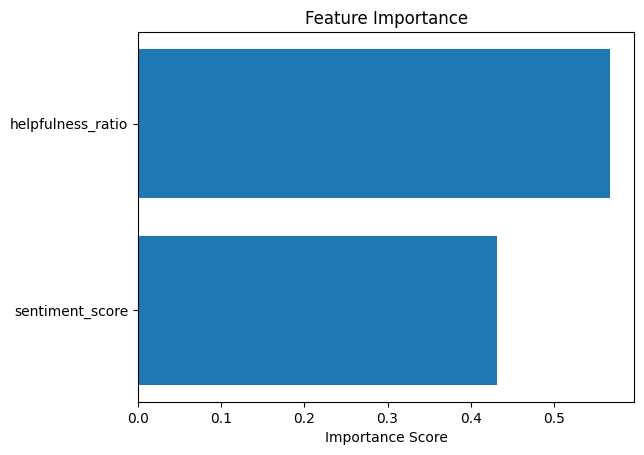

In [30]:
# Feature Importance
feature_importance = model.feature_importances_
plt.barh(features.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()